In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

### Some constant

In [2]:
LR = 0.02  # Learning rate
SEED = 0x611262  # Random Seed

### Use the second dataset and Cross Entrophy for example

In [3]:
dataset = 2
method = 1

### Data Input

In [4]:
df1 = pd.read_csv(f"data/Logistic_data{dataset}-1.txt", header=None)
df2 = pd.read_csv(f"data/Logistic_data{dataset}-2.txt", header=None)

### Data Preprocessing

#### Instance dataframe

In [5]:
df = pd.concat([df1, df2])
df[df.shape[1]] = 1
df

,0,1,2
0,-0.315393,1.828732,1
1,-0.476204,2.551378,1
2,1.354411,-0.283322,1
3,1.281117,1.778870,1
4,0.850811,4.404025,1
...,...,...,...
45,-1.756437,7.702811,1
46,2.529756,1.812277,1
47,2.076089,1.942916,1
48,2.047522,2.210947,1


#### Label array

In [6]:
label = pd.Series([0] * len(df1) + [1] * len(df2))
label

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Length: 100, dtype: int64

### Gradient Descent

#### Select initial weights

In [7]:
np.random.seed(SEED)
w = np.random.random_sample((df.shape[1],))
w

array([0.15861586, 0.28567681, 0.58491085])

#### Create the sigmoid function

In [8]:
sigmoid = lambda x, w: 1 / (1 + np.exp(-np.dot(x, w)))
sigmoid

<function __main__.<lambda>(x, w)>

#### Main Gradient Descent process

In [9]:
data = df.values
for _ in range(5000):
    pred = sigmoid(data, w)
    if method == 0:
        loss = (label - pred) * pred * (1 - pred)  # L2 Loss Function
    else:
        loss = -(pred - label) / len(label)  # Cross-Entrophy Loss Function
    grad = np.dot(data.T, loss)  # Found out what the gradient is
    w += grad * LR  # Update weight
w

array([ 0.5311951 ,  0.59183439, -2.02832868])

### Print the results and plot

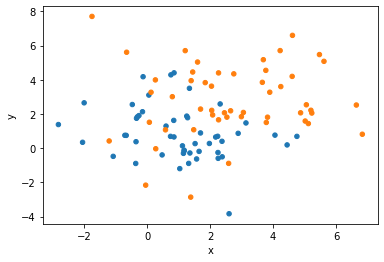

In [10]:
label_color = label.map({0: "tab:blue", 1: "tab:orange"})
plot = df.plot.scatter(x=0, y=1, c=label_color)
plot.set_xlabel("x")
plot.set_ylabel("y")
plot

In [11]:
 # Print statistic
result = pd.Series(np.rint(sigmoid(data, w)))
tp = ((result == 1) & (label == 1)).sum()
fn = ((result == 0) & (label == 1)).sum()
fp = ((result == 1) & (label == 0)).sum()
tn = ((result == 0) & (label == 0)).sum()
print(
    tabulate(
        pd.DataFrame(
            [[tn, fp], [fn, tp]],
            columns=["Predicted: 0", "Predicted: 1"],
            index=["Actual: 0", "Actual: 1"],
        ),
        tablefmt="pipe",
        headers="keys",
    )
)
print("")
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("Accuracy: ", (tp + tn) / (tp + tn + fp + fn))
print("")

|           |   Predicted: 0 |   Predicted: 1 |
|:----------|---------------:|---------------:|
| Actual: 0 |             40 |             10 |
| Actual: 1 |              9 |             41 |

Precision:  0.803921568627451
Recall:  0.82
Accuracy:  0.81



In [12]:
# Print weight
print("Weight: ", w)

Weight:  [ 0.5311951   0.59183439 -2.02832868]


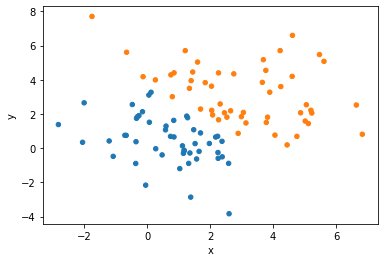

In [13]:
# Plot result
result_color = result.map({0: "tab:blue", 1: "tab:orange"})
plot = df.plot.scatter(x=0, y=1, c=result_color)
plot.set_xlabel("x")
plot.set_ylabel("y")
plot